In [ ]:
import random
import numpy as np

In [ ]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [ ]:
import pandas as pd

In [5]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5),(5,5),(3.5,-2.5),(-2.5,2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=1)

In [6]:
X,y

(array([[-4.16101659, -4.06889792],
        [-2.53536792,  4.61060505],
        [ 3.99233656, -3.18067814],
        [ 3.6340482 , -1.29794514],
        [-4.44332341,  2.85249436],
        [-2.61598519,  2.32454103],
        [ 4.16102029, -0.70784179],
        [ 4.96130449,  3.38422765],
        [-2.97537288,  2.97761018],
        [ 3.00178644, -2.81098498],
        [-6.44411381, -5.50446586],
        [-1.64729594,  2.5353601 ],
        [ 3.24582013, -1.10015606],
        [-4.71441267, -4.11485884],
        [-3.3301719 ,  1.6194224 ],
        [ 3.78474811, -2.23753255],
        [-4.25592564,  3.2147896 ],
        [ 2.16804833, -4.26068856],
        [-1.8789173 ,  3.4561217 ],
        [-2.77909772,  4.12284909],
        [ 0.706915  , -0.56247119],
        [-5.3224172 , -5.38405435],
        [ 1.84927873, -3.39055558],
        [-5.67124613, -5.0126646 ],
        [-4.87984105, -4.38279689],
        [ 2.3808846 , -0.5439211 ],
        [-5.34385368, -4.95640314],
        [ 6.90465871,  6.111

In [8]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [9]:
import matplotlib.pyplot as plt
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['label'] = y_pred

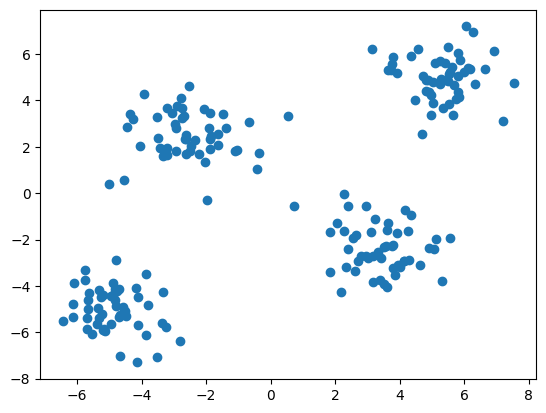

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['col1'],df['col2'])

In [16]:
X[y_pred == 3,1]

array([3.38422765, 6.1110567 , 4.9268873 , 5.61838026, 5.31354772,
       4.37646927, 4.39607937, 6.23616403, 4.38263794, 3.87798127,
       3.68771659, 4.71269214, 5.24073709, 2.56516224, 4.00297317,
       5.68255141, 4.75136522, 7.18697965, 4.14048406, 5.2135339 ,
       5.03261455, 4.88094581, 3.10363908, 5.40890054, 5.3380117 ,
       6.29322588, 5.75041164, 5.36949272, 4.70335885, 5.59357852,
       5.0465673 , 6.2245077 , 5.4202822 , 5.86334532, 4.6801984 ,
       5.16938243, 4.89825413, 4.22483838, 5.31515939, 6.04444209,
       4.82529684, 5.90148689, 6.96710175, 4.89984477, 3.37256166,
       3.85565861, 5.13770121, 4.0462994 , 5.5505375 , 4.77368576])

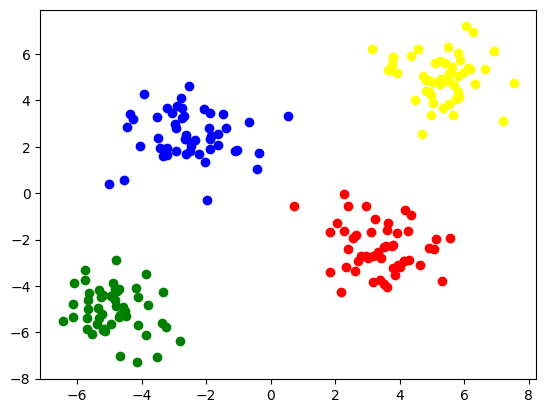

In [17]:
plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1],color='blue')
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1],color='red')
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1],color='green')
plt.scatter(X[y_pred == 3,0],X[y_pred == 3,1],color='yellow')